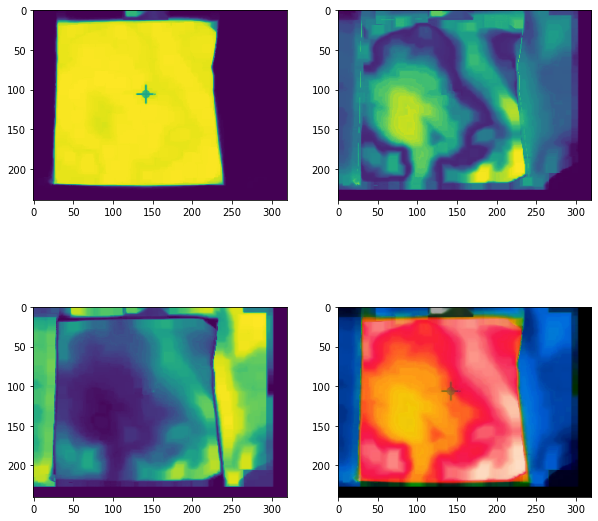

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read referance image
im1 =  cv2.imread("/Users/saarahasad/Desktop/Niramai/Assignment3/Sample1/first.jpg"); 
# Read image to be aligned
im2 =  cv2.imread("/Users/saarahasad/Desktop/Niramai/Assignment3/Sample1/second.jpg");

im2 = cv2.resize(im2, (320, 240))
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

# Find size of image1
sz_im1 = im1.shape

# Define the translation model
warp_mode = cv2.MOTION_TRANSLATION

# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)

# Specify the number of iterations.
number_of_iterations = 5000;

# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;

# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)

# Use warpAffine for Translation, Euclidean and Affine
if warp_mode == cv2.MOTION_TRANSLATION :
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz_im1[1],sz_im1[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
else :
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz_im1[1],sz_im1[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)


kernel = np.ones((10,10),np.uint8)

# erosion followed by dilation
opening = cv2.morphologyEx(im2_aligned, cv2.MORPH_OPEN, kernel)
    
# convert img to hsv img
hsv_img = cv2.cvtColor(opening,cv2.COLOR_BGR2HSV)

# (hMin = 0 , sMin = 0, vMin = 58), (hMax = 179 , sMax = 173, vMax = 255)
I_MIN = np.array([84, 0, 0],np.uint8)
I_MAX = np.array([171, 214, 255],np.uint8)
frame_threshed = cv2.inRange(hsv_img, I_MIN, I_MAX)
paint_img = cv2.inpaint(hsv_img, frame_threshed, 5, cv2.INPAINT_NS)
rgbimg = cv2.cvtColor(paint_img, cv2.COLOR_HSV2RGB)

kernel = np.ones((13,13),np.uint8)
opening = cv2.morphologyEx(rgbimg, cv2.MORPH_OPEN, kernel)

# display red, green, blue channels and image

red,green,blue=cv2.split(rgbimg)
f, axarr = plt.subplots(2,2,figsize=(10, 10))
axarr[0,0].imshow(red)
axarr[0,1].imshow(green)
axarr[1,0].imshow(blue)
axarr[1,1].imshow(rgbimg)


